In [ ]:
import kagglehub
import os
import numpy as np
import cv2
import glob
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [107]:
path = kagglehub.dataset_download("danielwe14/stereocamera-chessboard-pictures", force_download=True)
data_dir = os.path.join(path, "data/imgs/leftcamera")

100%|██████████| 14.8M/14.8M [00:01<00:00, 11.9MB/s]

Extracting files...


In [110]:
# Define the size of the chessboard (9x6 in this example)
board_size = (11, 7)

# Prepare 3D points in real world space
objp = np.zeros((board_size[0]*board_size[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:board_size[0], 0:board_size[1]].T.reshape(-1, 2)

# Arrays to store 3D points and 2D points from all images
objpoints = []  # 3D points in real world space
imgpoints = []  # 2D points in image plane

# Load all chessboard images
images = glob.glob(f'{data_dir}/*.png')
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, board_size, None)
    # If found, add object points and image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, board_size, corners, ret)
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Chessboard corners - {fname}")
        plt.axis("off")
        plt.show()


cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [ ]:
fname = './distorted_image.jpeg'
distorted_img = cv2.imread(fname)
h, w = img.shape[:-1]
new_mtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
undistorted_image = cv2.undistort(distorted_img, mtx, dist, None, new_mtx)
x, y, w, h = roi
undistorted_image_cropped = undistorted_image[y:y+h, x:x+w]

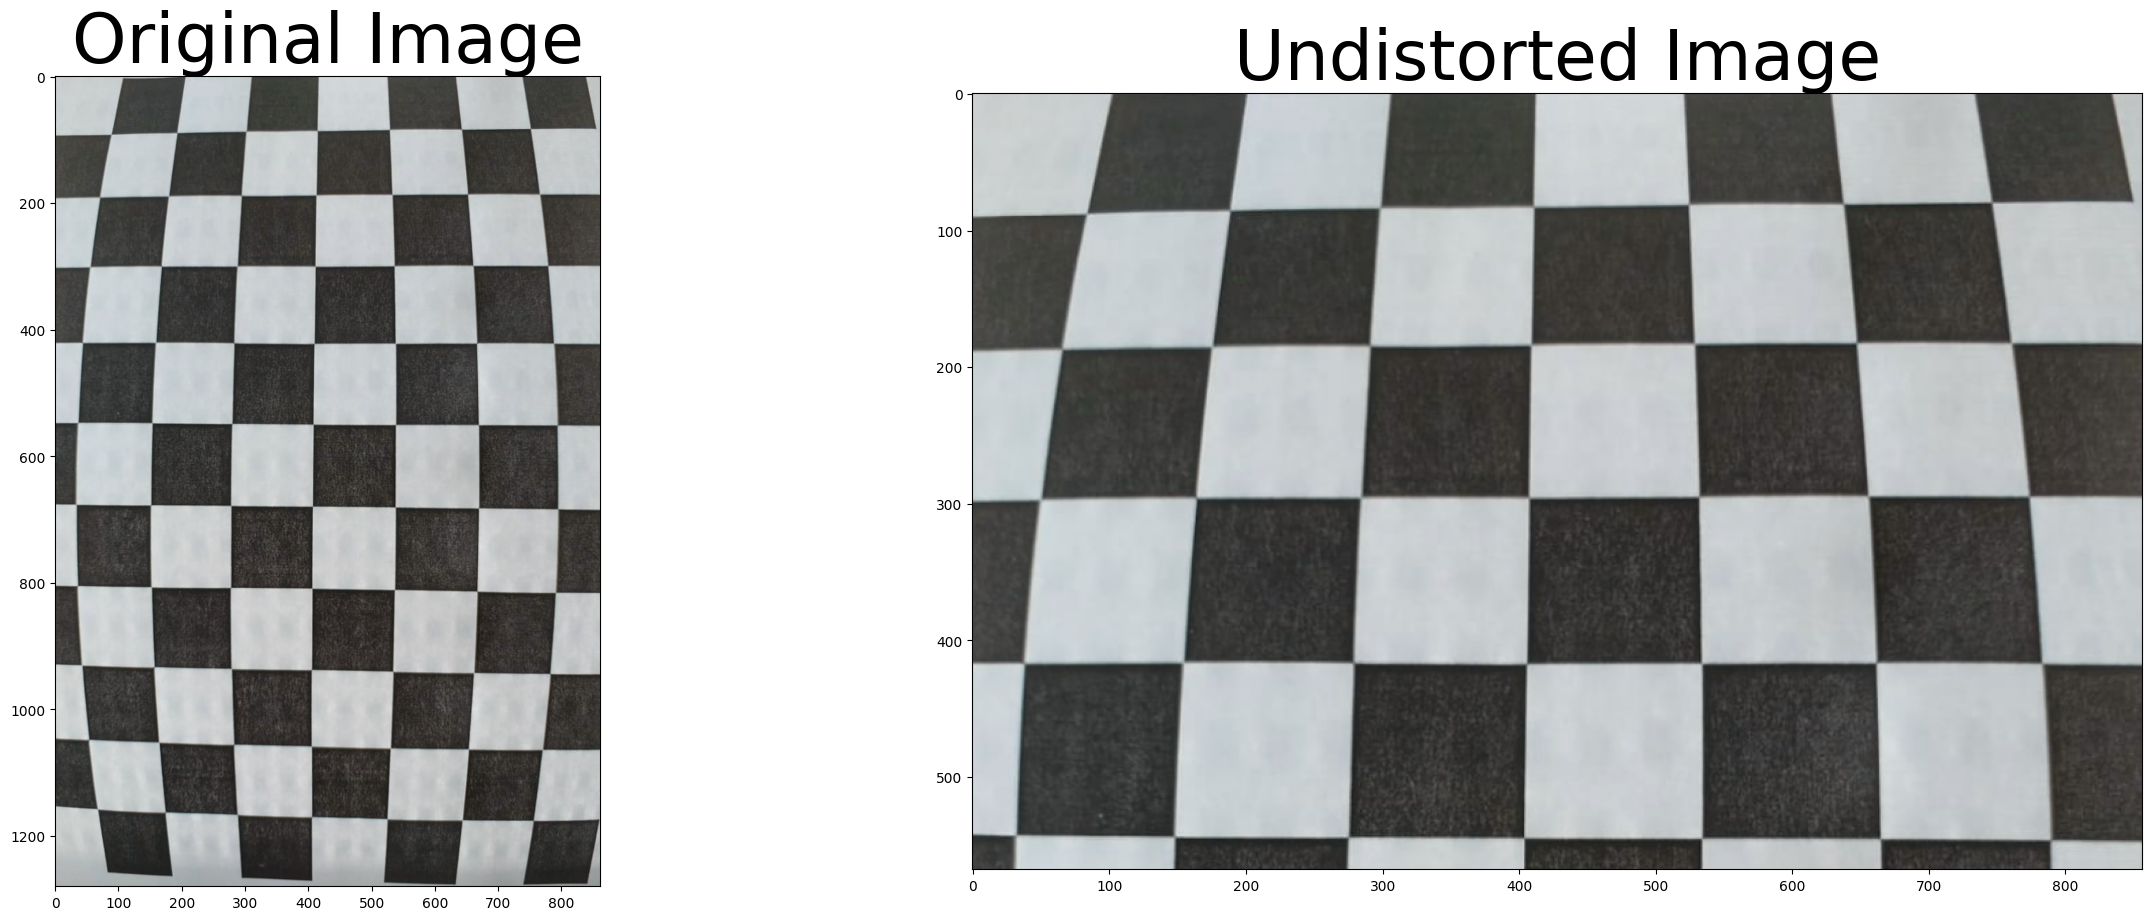

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(distorted_img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted_image_cropped)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
mean_error = 0

# Iterate through each set of object points and corresponding image points
for i in range(len(objpoints)):
    # Project the 3D points to the image plane
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)

    # Calculate the error between actual and projected points
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
    mean_error += error

print(f"Total reprojection error: {mean_error / len(objpoints)}")

Total reprojection error: 0.02417473613728519
